In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt

import math
from utils import *

nS = 100
nA = 2
seed = 2184109
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, gamma=gamma, small=5, large=1000, seed=seed)
tau = 1
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)


In [2]:
alpha_tau = 0.0005
Qs = []
visit_distributions = []
taus = []
while tau < 1.00001 and tau > 0:
    Q_star = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, tmdp.gamma)["Q"]
    pi = get_policy(Q_star)

    r_s_a_xi = compute_r_s_a(tmdp.xi, tmdp.reward)
    r_s_a_p = compute_r_s_a(tmdp.P_mat, tmdp.reward)
    r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)

    d = compute_d(mu, tmdp.P_mat_tau, pi, tmdp.gamma)

    q_p = get_q_hat( tmdp.P_mat, r_s_a_p, tmdp.gamma, Q_star)
    q_xi = get_q_hat(tmdp.xi, r_s_a_xi, tmdp.gamma, Q_star)
    grad = compute_grad_j(pi, q_p, q_xi, d, tmdp.gamma)
    print("Gradient: ", grad)
    Qs.append(Q_star)
    visit_distributions.append(d)
    taus.append(tmdp.tau)
    tau = max(0, tau + alpha_tau * grad)
    print("Updating tau from {} to {}".format(tmdp.tau, tau))
    tmdp.update_tau(tau)
print("Moving to the original problem")
Q_star = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, tmdp.gamma)["Q"]
pi = get_policy(Q_star)

r_s_a_xi = compute_r_s_a(tmdp.xi, tmdp.reward)
r_s_a_p = compute_r_s_a(tmdp.P_mat, tmdp.reward)
r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)

d = compute_d(mu, tmdp.P_mat_tau, pi, tmdp.gamma)

q_p = get_q_hat( tmdp.P_mat, r_s_a_p, tmdp.gamma, Q_star)
q_xi = get_q_hat(tmdp.xi, r_s_a_xi, tmdp.gamma, Q_star)
grad = compute_grad_j(pi, q_p, q_xi, d, tmdp.gamma)
print("Gradient: ", grad)
Qs.append(Q_star)
visit_distributions.append(d)
taus.append(tmdp.tau)

Gradient:  -29.135450006449148
Updating tau from 1 to 0.9854322749967754
Gradient:  -28.851030237087716
Updating tau from 0.9854322749967754 to 0.9710067598782316
Gradient:  -28.567788258924466
Updating tau from 0.9710067598782316 to 0.9567228657487694
Gradient:  -28.289792597201167
Updating tau from 0.9567228657487694 to 0.9425779694501688
Gradient:  -28.017025027417073
Updating tau from 0.9425779694501688 to 0.9285694569364603
Gradient:  -27.74947116320858
Updating tau from 0.9285694569364603 to 0.9146947213548561
Gradient:  -27.487120783824828
Updating tau from 0.9146947213548561 to 0.9009511609629437
Gradient:  -27.229967814383716
Updating tau from 0.9009511609629437 to 0.8873361770557519
Gradient:  -26.978010700315416
Updating tau from 0.8873361770557519 to 0.8738471717055941
Gradient:  -26.731252468033887
Updating tau from 0.8738471717055941 to 0.8604815454715772
Gradient:  -26.48970098923003
Updating tau from 0.8604815454715772 to 0.8472366949769622
Gradient:  -26.25336935662124

In [3]:
metrics = compute_metrics(tmdp, Qs, Q_star, visit_distributions)


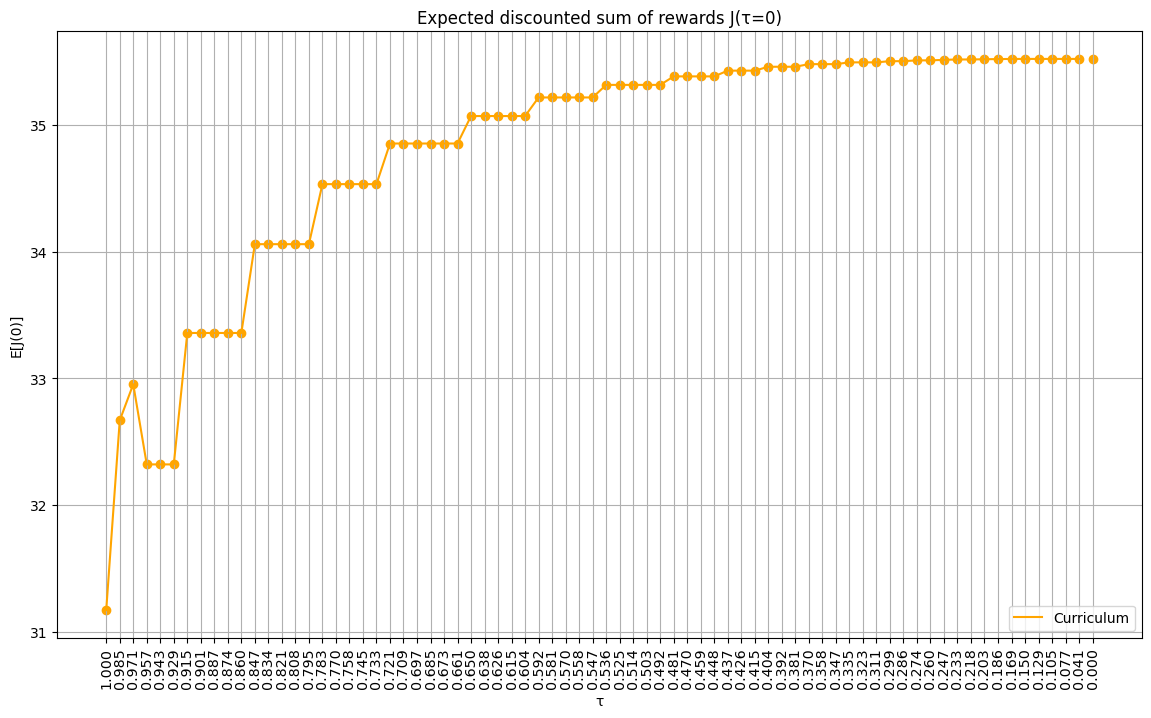

In [24]:
x = np.array([])
y = np.array([])

for i, J in enumerate(metrics["J"]):
    
    if i < len(metrics["J"])-1:
        x = np.append(x, "{:.3f}".format(taus[i]))
        y = np.append(y, J)

x_map = np.array([i for i in range(len(x))])
plt.figure(figsize=(14,7.875))
plt.xticks(rotation=90, fontsize=10.3)
plt.scatter(x, y, c="orange")
plt.plot(x[:-1], y[:-1], c="orange", label="Curriculum")
plt.legend(loc="lower right")
plt.xlabel("τ")
plt.ylabel("E[J(0)]")
plt.title("Expected discounted sum of rewards J(τ=0)")
plt.grid(visible=True)

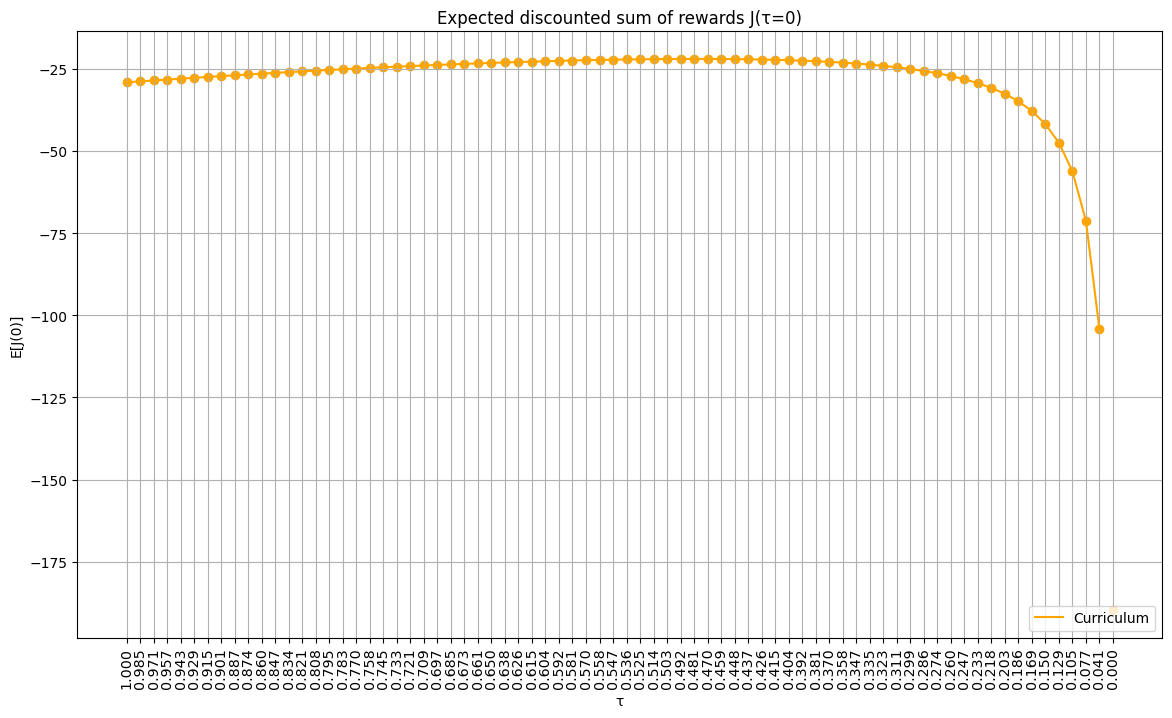

In [18]:
x = np.array([])
y = np.array([])

for i, J in enumerate(metrics["grad_J"]):
    if i < len(metrics["grad_J"])-1:
        x = np.append(x, "{:.3f}".format(taus[i]))
        y = np.append(y, J)

x_map = np.array([i for i in range(len(x))])
plt.figure(figsize=(14,7.875))
plt.xticks(rotation=90, fontsize=10.3)
plt.scatter(x, y, c="orange")
plt.plot(x[:-1], y[:-1], c="orange", label="Curriculum")
plt.legend(loc="lower right")
plt.xlabel("τ")
plt.ylabel("E[J(0)]")
plt.title("Expected discounted sum of rewards J(τ=0)")
plt.grid(visible=True)